In [1]:
#April_19th_Online_shopping & Recommendation Engine

Online shopping Customer Segmentation

**Problem statement**
-  # Customer Segmentation and Recommendation
-  1.Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 
-  2.Identify trends for Day, Month, Season, Time by Invoice count
-  3.Create a recommendation of different product as per specific client. 
-  4 Movie Recommendation as per Movie Tags / Review.(MOVIE DATASET)
-  

Recency, frequency, monetary value (RFM) is a model used in marketing 
analysis that segments a company’s consumer base by their purchasing 
patterns or habits. In particular, it evaluates customers’ recency 
(how long ago they made a purchase), frequency (how often they make purchases), 
and monetary value (how much money they spend).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
original_data=pd.read_excel("Online_shopping.xlsx")

# Problem statement 1. Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 

In [4]:
df=original_data.copy()
df.head(100)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
95,536378,22352,lunch box with cutlery retrospot,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,pack of 72 retrospot cake cases,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,pack of 60 dinosaur cake cases,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,pack of 60 pink paisley cake cases,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [5]:
# Recency ---- Latest date-Last date of invoice of a customer
# Frequency ---- Total no. of Invoice generated a particular client
# Monetary ----- Sum of all invoice of a particular client

In [6]:
df["Country"].value_counts(normalize=True)

Country
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
Eu

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [8]:
# Segmentaion - customer clustering on basis of Recency , Frequency,Monetary

In [9]:
# we dont need the following items.

In [10]:
df1=df.drop(["StockCode","Description","lower","Country"],axis=1)
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [11]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

# experiment

In [12]:
df100=df1.copy()

In [13]:
first_df=df100[df100["CustomerID"].notnull()]
second_df=df100[df100["CustomerID"].isnull()]

In [14]:
second_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,56,2010-12-01 11:52:00,0.00,NaN
1443,536544,1,2010-12-01 14:32:00,2.51,NaN
1444,536544,2,2010-12-01 14:32:00,2.51,NaN
1445,536544,4,2010-12-01 14:32:00,0.85,NaN
1446,536544,2,2010-12-01 14:32:00,1.66,NaN
...,...,...,...,...,...
541536,581498,5,2011-12-09 10:26:00,4.13,NaN
541537,581498,4,2011-12-09 10:26:00,4.13,NaN
541538,581498,1,2011-12-09 10:26:00,4.96,NaN
541539,581498,1,2011-12-09 10:26:00,10.79,NaN


In [15]:
first_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [16]:
testing=first_df["InvoiceNo"].isin(second_df["InvoiceNo"])

In [17]:
testing

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 406829, dtype: bool

In [18]:
testing.value_counts()

InvoiceNo
False    406829
Name: count, dtype: int64

# continue the project

In [19]:
df1.dropna(axis=0,inplace=True)

In [20]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [21]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [22]:
# Quantity is negative because some customer has returned the item.
# unit price can be zero because its a free item

In [23]:
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [24]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [25]:
# we are considering return as - No busines but we are not dropping those transations and customers

In [26]:
df1=df1[df1["Quantity"]>0]

In [27]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [28]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [29]:
# create a column total =Qty* unit price

In [30]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [31]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [32]:
df_final100=df2.groupby(["InvoiceNo"]).agg({"Total":"sum"}).reset_index()
df_final100.head()

,InvoiceNo,Total
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [33]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [34]:
df_final.head(100)

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
95,536569,2010-12-01 15:35:00,16274.0,357.95
96,536570,2010-12-01 15:35:00,14496.0,304.34
97,536571,2010-12-01 15:37:00,14696.0,294.62
98,536572,2010-12-01 15:40:00,16539.0,442.35


# learning purpose--start

In [35]:
duplicate1=df_final[df_final.duplicated(subset=["InvoiceNo"])]
duplicate1


,InvoiceNo,InvoiceDate,CustomerID,Total
117,536591,2010-12-01 16:58:00,14606.0,39.06
1472,540185,2011-01-05 13:41:00,14653.0,132.66
1967,541596,2011-01-19 16:19:00,17602.0,581.13
1979,541631,2011-01-20 10:48:00,12637.0,935.13
2039,541816,2011-01-21 15:57:00,17799.0,122.44
2056,541849,2011-01-23 13:34:00,13230.0,154.79
2195,542217,2011-01-26 12:36:00,14606.0,158.50
2411,542806,2011-02-01 11:20:00,12836.0,798.99
2564,543179,2011-02-04 10:32:00,12754.0,23.93
2788,543777,2011-02-11 16:20:00,15406.0,243.04


In [36]:
duplicate100=df_final[df_final.duplicated("CustomerID")]
duplicate100

,InvoiceNo,InvoiceDate,CustomerID,Total
1,536366,2010-12-01 08:28:00,17850.0,22.20
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
7,536372,2010-12-01 09:01:00,17850.0,22.20
8,536373,2010-12-01 09:02:00,17850.0,259.86
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


In [37]:
len(duplicate100)

14227

In [38]:
len(df_final)

18566

In [39]:
# no. of clients who has purchased only one time

len(df_final)-len(duplicate100)

4339

In [40]:
len(duplicate1)

30

In [41]:
df_final[df_final["InvoiceNo"]==544667].Total

3147    1980.82
3148    1355.94
Name: Total, dtype: float64

In [42]:
df_final10=df_final.drop_duplicates(subset=["InvoiceNo"])
df_final10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18536 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18536 non-null  int64         
 1   InvoiceDate  18536 non-null  datetime64[ns]
 2   CustomerID   18536 non-null  float64       
 3   Total        18536 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 724.1 KB


In [43]:
# another option

In [44]:
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [45]:
#df3 is adata frame having only invoice date and cust Id
df3=df2.drop(["InvoiceDate","CustomerID"],axis=1)
df4=df2.drop(["Total"],axis=1)

In [46]:
df3.head()

,InvoiceNo,Total
0,536365,15.30
1,536365,20.34
2,536365,22.00
3,536365,20.34
4,536365,20.34


In [47]:
df4.head(2)

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
1,536365,2010-12-01 08:26:00,17850.0


In [48]:
df3=df3.groupby(["InvoiceNo"]).sum()
df3.head()

,Total
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [49]:
df3.reset_index(inplace=True)

In [50]:
df3.head()

,InvoiceNo,Total
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18536 entries, 0 to 18535
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   InvoiceNo  18536 non-null  int64  
 1   Total      18536 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 289.8 KB


In [52]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   InvoiceDate  397924 non-null  datetime64[ns]
 2   CustomerID   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.1+ MB


In [53]:
df4=df4.drop_duplicates(subset=["InvoiceNo"])
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18536 entries, 0 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18536 non-null  object        
 1   InvoiceDate  18536 non-null  datetime64[ns]
 2   CustomerID   18536 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 579.2+ KB


In [54]:
df_final2=pd.merge(df4,df3,how="left",on="InvoiceNo")
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18536 entries, 0 to 18535
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18536 non-null  object        
 1   InvoiceDate  18536 non-null  datetime64[ns]
 2   CustomerID   18536 non-null  float64       
 3   Total        18536 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 579.4+ KB


# learning--Done

In [55]:
# Goal 1:- PERFORMING Cust Segment on R F M

In [56]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [57]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [58]:
# the given dataset belongs to Dec 1st 2010 to Dec 9th 2011

Recency= Latest Date - last Invoice date of customer

In [59]:
# to create a latest date 

In [60]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [61]:
# Recency--Latest Date - last Invoice date of customer
# frequency - count of invoice no.(how many times the customer id appear)
# Monetary-Sum of total-

In [62]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [63]:
RFM_Score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [64]:
RFM_Score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [65]:
# Rename the column Name
RFM_Score=RFM_Score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [66]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [67]:
RFM1=RFM_Score.copy()

In [68]:
RFM1["R_Rank"]=RFM1["Recency"].rank(ascending=False)

In [69]:
RFM1["R_Rank"]

0        162.5
1       4156.5
2       1646.0
3       3209.5
4        227.5
         ...  
4334     355.0
4335     860.0
4336    3839.5
4337    4064.5
4338    2357.0
Name: R_Rank, Length: 4339, dtype: float64

In [70]:
RFM1["F_Rank"]=RFM1["Frequency"].rank(ascending=True)

In [71]:
RFM1["M_Rank"]=RFM1["Monetary"].rank(ascending=True)

In [72]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [73]:
RFM1["R_final"]=(RFM1["R_Rank"]/RFM1["R_Rank"].max())*100

In [74]:
RFM1["R_final"]

0        3.759833
1       96.170754
2       38.084220
3       74.259602
4        5.263767
          ...    
4334     8.213790
4335    19.898195
4336    88.836187
4337    94.042110
4338    54.534938
Name: R_final, Length: 4339, dtype: float64

In [75]:
RFM1["F_final"]=(RFM1["F_Rank"]/RFM1["F_Rank"].max())*100

In [76]:
RFM1["M_final"]=(RFM1["M_Rank"]/RFM1["M_Rank"].max())*100

In [77]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [78]:
RFM1.drop(columns=["R_Rank","F_Rank","M_Rank"],inplace=True)

In [79]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546


In [80]:
# we can assign the weightage on R F M

In [81]:
RFM1["RFM_SUM"]=0.15*RFM1["R_final"]+0.30*RFM1["F_final"]+0.60*RFM1["M_final"]

In [82]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579,65.600850
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327,95.440824
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981,72.751121
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671,62.015870
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546,22.959420


In [83]:
RFM1=RFM1.round(2)
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96


In [84]:
max(RFM1["RFM_SUM"])

104.92

In [85]:
min(RFM1["RFM_SUM"])

5.36

In [86]:
loyality_label=["Silver","Gold","Diamond","Platinum"]

In [87]:
quantile100=RFM1["RFM_SUM"].quantile(q=[0.25,0.50,0.75])

In [88]:
quantile100

0.25    28.365
0.50    51.290
0.75    75.885
Name: RFM_SUM, dtype: float64

In [89]:
# create a function
def loyality(x):
    if x<=28:
        return "Silver"
    elif x<=51:
        return "Gold"
    elif x<=76:
        return "Diamond"
    else:
        return "Platinum"
        

In [90]:
RFM1["Loyality"]=RFM1["RFM_SUM"].apply(loyality)

In [92]:
RFM1.head(100)

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver
...,...,...,...,...,...,...,...,...,...
95,12462.0,18,2,1189.59,74.26,44.03,66.47,64.23,Diamond
96,12463.0,53,4,1344.78,48.37,69.79,69.81,70.08,Diamond
97,12464.0,10,8,1212.05,83.64,88.22,66.88,79.14,Platinum
98,12465.0,17,2,742.19,75.72,44.03,53.24,56.51,Diamond


In [93]:
RFM1["Loyality"].value_counts()

Loyality
Diamond     1101
Gold        1098
Platinum    1080
Silver      1060
Name: count, dtype: int64

In [94]:
# all the above segregation is mannual approach

# K means ALGORITHM segrigation

In [95]:
New_data=RFM1["RFM_SUM"]
New_data.head()
New_data=pd.DataFrame(New_data)

In [96]:
from sklearn.cluster import KMeans

In [97]:
kmeans1=KMeans(n_clusters=4,max_iter=100,random_state=10)

In [98]:
y_means=kmeans1.fit_predict(New_data)
y_means

array([3, 0, 3, ..., 1, 0, 3])

In [99]:
RFM1["Cluster"]=kmeans1.labels_
RFM1.head(100)

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,3
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,0
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,3
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,3
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,2
...,...,...,...,...,...,...,...,...,...,...
95,12462.0,18,2,1189.59,74.26,44.03,66.47,64.23,Diamond,3
96,12463.0,53,4,1344.78,48.37,69.79,69.81,70.08,Diamond,3
97,12464.0,10,8,1212.05,83.64,88.22,66.88,79.14,Platinum,0
98,12465.0,17,2,742.19,75.72,44.03,53.24,56.51,Diamond,3


In [100]:
RFM1["Cluster"].value_counts()

Cluster
2    1250
1    1107
3    1039
0     943
Name: count, dtype: int64

In [101]:
# Evaluation of cluster

In [102]:
from sklearn.metrics import silhouette_score

In [103]:
labels=kmeans1.labels_
print(silhouette_score(New_data,labels))

0.5649352983403836


In [104]:
# Goal no. 2 ------ Analysing the sales Trend as per day, timing, season, month,weekend

In [105]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [106]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [107]:
df_final100=df_final.copy()
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [108]:
# how to extract info from Datetime datatypes

In [109]:
import datetime as dt

In [110]:
df_final100["Day"]=df_final100["InvoiceDate"].dt.day_name()

In [111]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday


In [112]:
df_final100["Day"].value_counts()

Day
Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: count, dtype: int64

In [113]:
df_final100["Month"]=df_final100["InvoiceDate"].dt.month

In [114]:
df_final100["Hour"]=df_final100["InvoiceDate"].dt.hour

In [115]:
#df_final100["Date"]=df_final100["InvoiceDate"].dt.date

In [116]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8


In [117]:
df_final100["week_info"]=np.where((df_final100.Day=="Saturday")|(df_final100.Day=="Sunday"),"Weekend","WeekDay")

In [118]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,week_info
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,WeekDay
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,WeekDay
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,WeekDay
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,WeekDay
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,WeekDay


In [119]:
# analysing the business as per day

In [120]:
day_count=df_final100.groupby("Day")["InvoiceNo"].count().to_frame("count_of_invoices").reset_index()

In [121]:
day_count

,Day,count_of_invoices
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


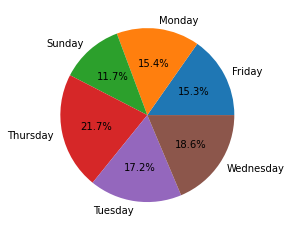

In [122]:
plt.pie(day_count['count_of_invoices'],autopct='%0.01f%%',labels=day_count['Day'])
plt.show()

#### assignment 
(1)plot the no. of invoice by season...winter, Monsoon,Summer,spring
(2)plot the no. of invoice by morning, afternoon, evening 
(3)plot the no. of invoice by Month 

In [ ]:
# function to create season and timing

In [124]:
def cal_season(x):
    if x in [10,11,12,1]:
        return "Winter"
    if x in [2,3]:
        return "spring"
    if x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [126]:
def cal_timing(x):
    if x in range(4,7):
        return "early morning"
    elif x in range(7,11):
        return "Morning"
    elif x in range(11,16):
        return "afternoon"
    else:
        return "evening"

In [128]:
df_final100["season"]=df_final100["Month"].apply(cal_season)

In [129]:
df_final100["Time"]=df_final100["Hour"].apply(cal_timing)

In [130]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,week_info,season,Time
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,WeekDay,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,WeekDay,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,WeekDay,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,WeekDay,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,WeekDay,Winter,Morning


In [131]:
df_final100["Time"].value_counts()

Time
afternoon        12374
Morning           4209
evening           1982
early morning        1
Name: count, dtype: int64

In [132]:
season_count = df_final100.groupby('season')['InvoiceNo'].count().to_frame('count_of_invoices')

In [133]:
season_count.reset_index(inplace=True)

In [134]:
season_count

,season,count_of_invoices
0,Monsoon,4371
1,Summer,4106
2,Winter,7762
3,spring,2327


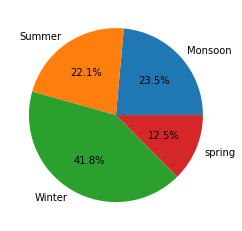

In [135]:
plt.pie(season_count.count_of_invoices,labels=season_count['season'],autopct='%.1f%%')
plt.show()

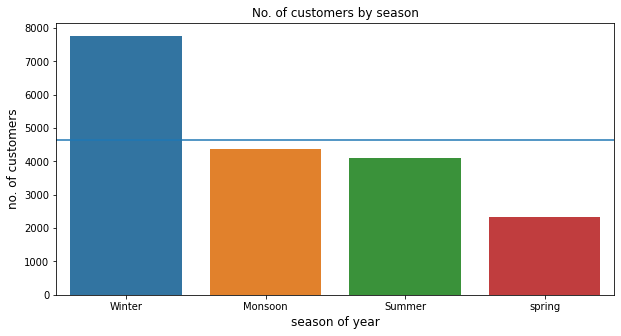

In [136]:
# plot number of customers by season graph
season=df_final100["season"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(season.index,season.values)
#plot the average 
plt.axhline(y=season.mean())
plt.title("No. of customers by season")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("season of year",fontsize=12)
plt.show()

# Recommendation Engine

The recommendations that companies give you sometimes use data analysis 
techniques to identify items that match your taste and preferences. 

Recommendation Engine:-
A recommendation engine is a data filtering system that operates on different 
machine learning algorithms to recommend products, services, and information to 
users based on data analysis. It works on the principle of finding patterns in 
customer behavior data employing a variety of factors such as customer preferences, 
past transaction history, attributes, or situational context.

Different Techniques of Recommendation Engines
There are three different types of recommender engines known in 
machine learning, and they are:

1. Collaborative Filtering

The collaborative filtering method collects and analyzes data on user 
behavior, online activities, and preferences to predict what they will 
like based on the similarity with other users. It uses a matrix-style 
formula to plot and calculates these similarities.

Advantage

One significant advantage of collaborative filtering is that 
it doesn’t need to analyze or understand the object (products, films, books) 
to recommend complex items precisely. There is no dependence on analyzable 
machine content, which means it chooses recommendations based on what it knows about the user.

Example

If user X likes Book A, Book B, and Book C while user Y likes Book A, 
Book B, and Book D, they have similar interests. So, it is favorably 
possible that user X would select Book D and user Y would enjoy reading Bood C. 
This is how collaborative filtering happens.

2. Content-Based Filtering

Content-based filtering works on the principle of describing a product 
and a profile of the user’s desired choices. It assumes that you will 
also like this other item if you like a particular item. Products are 
defined using keywords (genre, product type, color, word length) to make 
recommendations. A user profile is created to describe the kind of item 
this user enjoys. Then the algorithm evaluates the similarity of items 
using cosine and Euclidean distances.

Advantage

One significant advantage of this recommender engine technique is that it 
does not need any additional data about other users since the recommendations 
are specific to this user. Also, this model can capture the particular 
interests of a user and suggest niche objects that very few other users are interested in.

Example

Suppose a user X likes to watch action movies like Spider-man. In that case, 
this recommender engine technique only recommends movies of the action genre 
or films describing Tom Holland.

3. Hybrid Model

In hybrid recommendation systems, both the meta (collaborative) data and 
the transactional (content-based) data are used simultaneously to suggest 
a broader range of items to the users. In this technique, natural language 
processing tags can be allocated for each object (movie, song), and vector 
equations calculate the similarity. A collaborative filtering matrix can then 
suggest things to users, depending on their behaviors, actions, and intentions.

Advantages

This recommendation system is up-and-coming and is said to outperform both of 
the above methods in terms of accuracy.

Example

Netflix uses a hybrid recommendation engine. It makes recommendations by 
analyzing the user’s interests (collaborative) and recommending such 
shows/movies that share similar attributes with those rated highly by the user(content-based).

In [137]:
df50=original_data.copy()
df50.head(100)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
95,536378,22352,lunch box with cutlery retrospot,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,pack of 72 retrospot cake cases,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,pack of 60 dinosaur cake cases,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,pack of 60 pink paisley cake cases,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [ ]:
# drop the column "lower"

In [139]:
df50=df50.drop(["lower"],axis=1)

In [140]:
df50.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [141]:
df50.dropna(axis=0,inplace=True)

In [142]:
df50.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [143]:
df50.shape

(406829, 8)

In [ ]:
# step 1-- create a pivot_table
# step 2-- apply cosine_similarity function on pivot_table

In [148]:
custI_matrix=df50.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum",fill_value=0)

In [149]:
custI_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we want to see the similarity or filteration of item code as per customer ID 

In [152]:
from sklearn.metrics.pairwise import cosine_similarity

In [153]:
similarity=cosine_similarity(custI_matrix)

In [154]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.14887891, ..., 0.01192112, 0.07451023,
        0.10894226],
       [0.        , 0.14887891, 1.        , ..., 0.        , 0.17517012,
        0.11009593],
       ...,
       [0.        , 0.01192112, 0.        , ..., 1.        , 0.00377618,
        0.        ],
       [0.        , 0.07451023, 0.17517012, ..., 0.00377618, 1.        ,
        0.04444524],
       [0.        , 0.10894226, 0.11009593, ..., 0.        , 0.04444524,
        1.        ]])

In [155]:
similarity.shape

(4372, 4372)

In [156]:
similarity[90]

array([0.        , 0.0299703 , 0.03342911, ..., 0.        , 0.07895145,
       0.        ])

In [157]:
sorted(similarity[90],reverse=True)

[1.0,
 0.5692838086641905,
 0.4837798571304113,
 0.4545992099057214,
 0.4229365246114713,
 0.3769227994294265,
 0.3712701645587307,
 0.3328636210502275,
 0.26069874454989433,
 0.2595845219458487,
 0.256633715996664,
 0.24708712314846384,
 0.23419854166404375,
 0.23192017485063052,
 0.2286203723271083,
 0.22838695213929686,
 0.2275677858678694,
 0.22606605083421424,
 0.22181761380513712,
 0.22126817805268817,
 0.21911668444601987,
 0.2170290677790022,
 0.2147732641325767,
 0.21098376350700837,
 0.2102227773792679,
 0.20905490262313375,
 0.20307135051098543,
 0.20142453057890736,
 0.2009578720828636,
 0.19949631890301406,
 0.19680945562099778,
 0.19486850119745966,
 0.19264620958460876,
 0.1916899542184103,
 0.19091906567832984,
 0.1905647258148831,
 0.18924927144252784,
 0.1871177598464085,
 0.18588393233524964,
 0.185625170531923,
 0.1852378181748003,
 0.18507047306074734,
 0.18494863784857685,
 0.1846580799244623,
 0.18320749516435814,
 0.18301370976137235,
 0.18291385949842237,
 0.18

In [158]:
final=pd.DataFrame(similarity)

In [159]:
final

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
4369,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000
4370,0.0,0.074510,0.175170,0.065295,0.019385,0.017238,0.0,0.104890,0.050042,0.063930,...,0.0,0.0,0.032142,0.070999,0.000000,0.000000,0.098201,0.003776,1.000000,0.044445


In [ ]:
# we need to set the customerid at rows and columns

In [160]:
final.columns=custI_matrix.index

In [161]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.0,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.0,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.0,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.019385,0.000000


In [162]:
final["customerID"]=custI_matrix.index

In [163]:
final=final.set_index("customerID")

In [165]:
final.head(100)

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
customerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.000000,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.000000,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.000000,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.000000,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12462.0,0.0,0.012024,0.001435,0.210580,0.001762,0.103558,0.103592,0.002685,0.001016,0.118546,...,0.0,0.0,0.047465,-0.000648,0.000000,0.002597,0.000000,0.000839,0.041771,0.106833
12463.0,0.0,0.195058,0.027851,0.067902,0.025912,0.117215,-0.001604,0.139604,0.172411,0.004446,...,0.0,0.0,0.083761,-0.000572,0.026079,0.000000,0.000000,0.000740,0.076073,0.063624
12464.0,0.0,0.000000,0.005360,0.003535,0.006583,0.042958,0.000000,0.000000,0.000000,0.020063,...,0.0,0.0,0.000000,0.000000,0.000000,0.231169,0.148431,0.000000,0.001029,0.000000


In [ ]:
# above matrix is the degree of similarity among the customers. we can use it for Recommendation

In [ ]:
# for example reference cust id 12350.0

In [166]:
final.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
15180.0    0.337317
15422.0    0.336127
13455.0    0.228141
15435.0    0.214309
             ...   
16217.0   -0.000602
18270.0   -0.000618
16252.0   -0.047206
14304.0   -0.053090
17548.0   -0.054147
Name: 12350.0, Length: 4372, dtype: float64

In [170]:
# CUSTOMER A--12350.0
item_cust_A=set(custI_matrix.loc[12350.0].iloc[custI_matrix.loc[12350.0].to_numpy().nonzero()].index)

In [168]:
item_cust_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [171]:
# CUSTOMER B--15180.0
item_cust_B=set(custI_matrix.loc[15180.0].iloc[custI_matrix.loc[15180.0].to_numpy().nonzero()].index)

In [172]:
item_cust_B

{22112, 22113, 22114, 22348, 22835, 72741}

In [173]:
Recommended_item_list_cust_A=item_cust_B-item_cust_A

In [174]:
Recommended_item_list_cust_A

{22112, 22113, 22114, 22835, 72741}

In [179]:
df50.loc[df50["StockCode"].isin(item_cust_B),["StockCode","Description"]].drop_duplicates().set_index("StockCode")

,Description
StockCode,
22114,HOT WATER BOTTLE TEA AND SYMPATHY
22835,HOT WATER BOTTLE I AM SO POORLY
22112,CHOCOLATE HOT WATER BOTTLE
22113,GREY HEART HOT WATER BOTTLE
72741,GRAND CHOCOLATECANDLE
22348,TEA BAG PLATE RED RETROSPOT


# movie recommendation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [227]:
movies=pd.read_csv("movies_dataset.csv")

In [228]:
movies_df=movies.copy()

In [229]:
movies_df.head()

,Unnamed: 0,movie_id,title,tags
0,0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [230]:
movies_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [231]:
movies_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [232]:
movies_df.isnull().sum()

movie_id    0
title       0
tags        0
dtype: int64

In [233]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4806 non-null   int64 
 1   title     4806 non-null   object
 2   tags      4806 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.8+ KB


In [234]:
movies_df["tags"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [235]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [236]:
# TF-IDF--

In [237]:
tfidf=TfidfVectorizer(stop_words="english")

In [238]:
overview_matrix=tfidf.fit_transform(movies_df["tags"])

In [239]:
overview_matrix.shape

(4806, 35547)

In [240]:
count_array=overview_matrix.toarray()

In [241]:
count_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [242]:
overview_matrix=pd.DataFrame(data=count_array,columns=tfidf.get_feature_names_out())

In [243]:
overview_matrix

,00,000,007,07am,10,100,1000,101,108,10th,...,única,über,đỗthịhảiyến,špelacolja,γη,юлияснигирь,卧底肥妈,张立,绝地奶霸,超级妈妈
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
from sklearn.metrics.pairwise import cosine_similarity

In [245]:
final=pd.DataFrame(cosine_similarity(count_array))

In [246]:
similarity_matrix=final.copy()

In [247]:
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805
0,1.000000,0.014639,0.007852,0.013737,0.061190,0.032827,0.001993,0.049723,0.012119,0.011939,...,0.000000,0.000000,0.015397,0.023433,0.000000,0.002570,0.005976,0.003233,0.003501,0.000000
1,0.014639,1.000000,0.008786,0.002398,0.021553,0.045884,0.002230,0.026534,0.013560,0.013359,...,0.000000,0.000000,0.003694,0.000000,0.000000,0.002876,0.000000,0.011305,0.000000,0.000000
2,0.007852,0.008786,1.000000,0.005825,0.015766,0.018652,0.002231,0.049387,0.019526,0.007165,...,0.011180,0.000000,0.000000,0.000000,0.014191,0.006986,0.000000,0.010239,0.000000,0.000000
3,0.013737,0.002398,0.005825,1.000000,0.007942,0.013620,0.009424,0.031928,0.011346,0.154448,...,0.001300,0.002335,0.000870,0.002853,0.010566,0.006158,0.000000,0.023996,0.031850,0.014796
4,0.061190,0.021553,0.015766,0.007942,1.000000,0.014538,0.016574,0.049659,0.004159,0.015152,...,0.005224,0.000000,0.000000,0.004205,0.000000,0.002221,0.000000,0.003965,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,0.002570,0.002876,0.006986,0.006158,0.002221,0.002245,0.003758,0.014054,0.021990,0.002345,...,0.000000,0.011689,0.000000,0.002194,0.003776,1.000000,0.000000,0.000000,0.007266,0.000000
4802,0.005976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004032,0.000000,0.000000,0.000000,0.000000,1.000000,0.008254,0.005642,0.000000
4803,0.003233,0.011305,0.010239,0.023996,0.003965,0.011782,0.000000,0.000000,0.018320,0.011307,...,0.006867,0.002181,0.013058,0.013459,0.000000,0.000000,0.008254,1.000000,0.016356,0.018551
4804,0.003501,0.000000,0.000000,0.031850,0.000000,0.003960,0.007155,0.000000,0.024223,0.004137,...,0.000000,0.009847,0.000000,0.000000,0.000000,0.007266,0.005642,0.016356,1.000000,0.009307


In [248]:
similarity_matrix[4]

0       0.061190
1       0.021553
2       0.015766
3       0.007942
4       1.000000
          ...   
4801    0.002221
4802    0.000000
4803    0.003965
4804    0.000000
4805    0.000000
Name: 4, Length: 4806, dtype: float64

In [249]:
similarity_score=list(enumerate(similarity[4]))

In [250]:
similarity_score

[(0, 0.0611900058014839),
 (1, 0.021553493463877846),
 (2, 0.015765772501535165),
 (3, 0.007941560921339394),
 (4, 1.0),
 (5, 0.014537683925908823),
 (6, 0.016573631568806393),
 (7, 0.049658886232173016),
 (8, 0.004159171240191602),
 (9, 0.015151951543959909),
 (10, 0.04660425115912152),
 (11, 0.0057866825282066985),
 (12, 0.03691819797089589),
 (13, 0.012206912147893057),
 (14, 0.018929645799537008),
 (15, 0.008669181809823585),
 (16, 0.038800754615080715),
 (17, 0.040761969172857654),
 (18, 0.02735924870312725),
 (19, 0.014086816505452352),
 (20, 0.010302278001350033),
 (21, 0.016480377544245656),
 (22, 0.0037387182526804237),
 (23, 0.0073460911647279924),
 (24, 0.01574020564893075),
 (25, 0.013161856454273473),
 (26, 0.060755274616927805),
 (27, 0.06561496886832667),
 (28, 0.043337468176871584),
 (29, 0.015051436454091384),
 (30, 0.005683220563915804),
 (31, 0.02657259421086516),
 (32, 0.03239222209807367),
 (33, 0.013718295861253452),
 (34, 0.0),
 (35, 0.01894099437050745),
 (36, 0

In [251]:
similarity_score=sorted(enumerate(similarity[4]),key=lambda x:x[1],reverse=True)

In [252]:
similarity_score

[(4, 1.0),
 (373, 0.15894056313936678),
 (1257, 0.13420591333037657),
 (487, 0.13239263643488067),
 (1741, 0.12648175834096262),
 (473, 0.11297453851426707),
 (270, 0.11215654339078907),
 (4166, 0.11113555524993918),
 (207, 0.09346108329670322),
 (752, 0.091105232657358),
 (2936, 0.08422774168478483),
 (2968, 0.08042148984854001),
 (833, 0.07932208785111869),
 (778, 0.07731738707479346),
 (2760, 0.07667646771427652),
 (581, 0.07528476358007148),
 (1201, 0.07513471578847279),
 (322, 0.07505739321969326),
 (1147, 0.07498431044906594),
 (1161, 0.0749601499430668),
 (4405, 0.0705773124218938),
 (870, 0.0699890631768371),
 (3910, 0.06942570321009302),
 (85, 0.06826742699335328),
 (345, 0.06743784823925295),
 (91, 0.06717995525371098),
 (1322, 0.06679724993255612),
 (1774, 0.06616021299306886),
 (27, 0.06561496886832667),
 (1071, 0.06504733743180058),
 (47, 0.06483551605466428),
 (931, 0.06303030626314496),
 (1310, 0.0616117095822259),
 (0, 0.0611900058014839),
 (2409, 0.06093260286275379),


in similarity_matrix 0 to 4806 are the movies and their similar movies.

It follows the below steps to make recommendations.

Get the index of the movie using the title. Get the list of similarity scores of the 
movies concerning all the movies. Enumerate them (create tuples) with the first element 
being the index and the second element is the cosine similarity score. Sort the list of 
tuples in descending order based on the similarity score. Get the list of the indices of 
the top 10 movies from the above sorted list. Exclude the first element because it is 
the title itself. Map those indices to their respective titles and return the movies list.

Now, let us create a series that maps the index of the matrix to movie names to make 
it easy for us to just feed in movie names and get the recommendation.

In [253]:
#movie_index_mapping
mapping=pd.Series(movies_df.index,index=movies_df["title"])
mapping

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4801
Newlyweds                                   4802
Signed, Sealed, Delivered                   4803
Shanghai Calling                            4804
My Date with Drew                           4805
Length: 4806, dtype: int64

In [254]:
movie_index=mapping["John Carter"]
movie_index

4

In [255]:
# create a function that will take the movie name and make recommendation

Now, Create a function that takes in the movie title
we will make a recommender function that will recommend us 
movies using cosine_similarity. Our function will take a movie name 
as input and then find the top 10 movies using the cosine similarity 
matrix we found above. 

In [256]:
def recommend_movie(movie_input):
    movie_index = mapping[movie_input]
    # get similarity value with other movies
    similarity_score = list(enumerate(similarity[movie_index]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # get the list of top 10 recommended movies
    similarity_score = similarity_score[:10]

    movie_ind = [i[0] for i in similarity_score]
    recommended_movies = movies['title'].iloc[movie_ind]
    print('The recommended movies:', movie_input,"is:")
    return recommended_movies

In [257]:
recommend_movie("John Carter")

The recommended movies:


4                       John Carter
373                 Mission to Mars
1257                     Get Carter
487                      Red Planet
1741                 Ghosts of Mars
473                   Mars Attacks!
270                     The Martian
4166    The Marine 4: Moving Target
207                    Total Recall
752             My Favorite Martian
Name: title, dtype: object

In [258]:
recommend_movie("Total Recall")

The recommended movies:


207              Total Recall
1025            The Cable Guy
487                Red Planet
373           Mission to Mars
1741           Ghosts of Mars
473             Mars Attacks!
270               The Martian
4                 John Carter
2968    The Last Days on Mars
1631               Virtuosity
Name: title, dtype: object